In [ ]:
#!pip install tensorflow-gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [ ]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dir_name_train_Demented = '/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train/Demented'
dir_name_train_NonDemented = '/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train/NonDemented'


In [ ]:
def plot_images(item_dir, n=6): #to represent images graphically
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [ ]:
def Images_details_Print_data(data, path): #printing the details about images
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for Demented:

 ====== Images in:  /content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train/Demented
images_count:	200
min_width:	176
max_width:	208
min_height:	208
max_height:	208



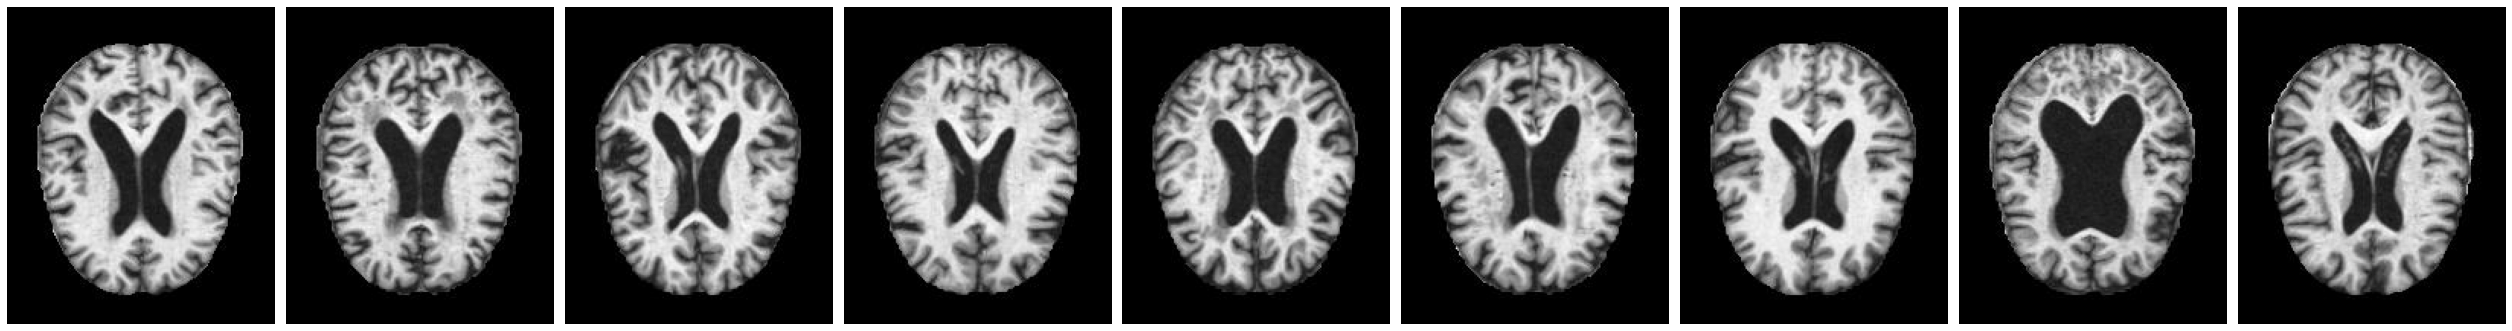

In [ ]:
print("")
print("Trainned data for Demented:")
print("")
Images_details(dir_name_train_Demented)
print("")
plot_images(dir_name_train_Demented, 9)


Trainned data for NonDemented:

 ====== Images in:  /content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train/NonDemented
images_count:	187
min_width:	176
max_width:	208
min_height:	208
max_height:	208



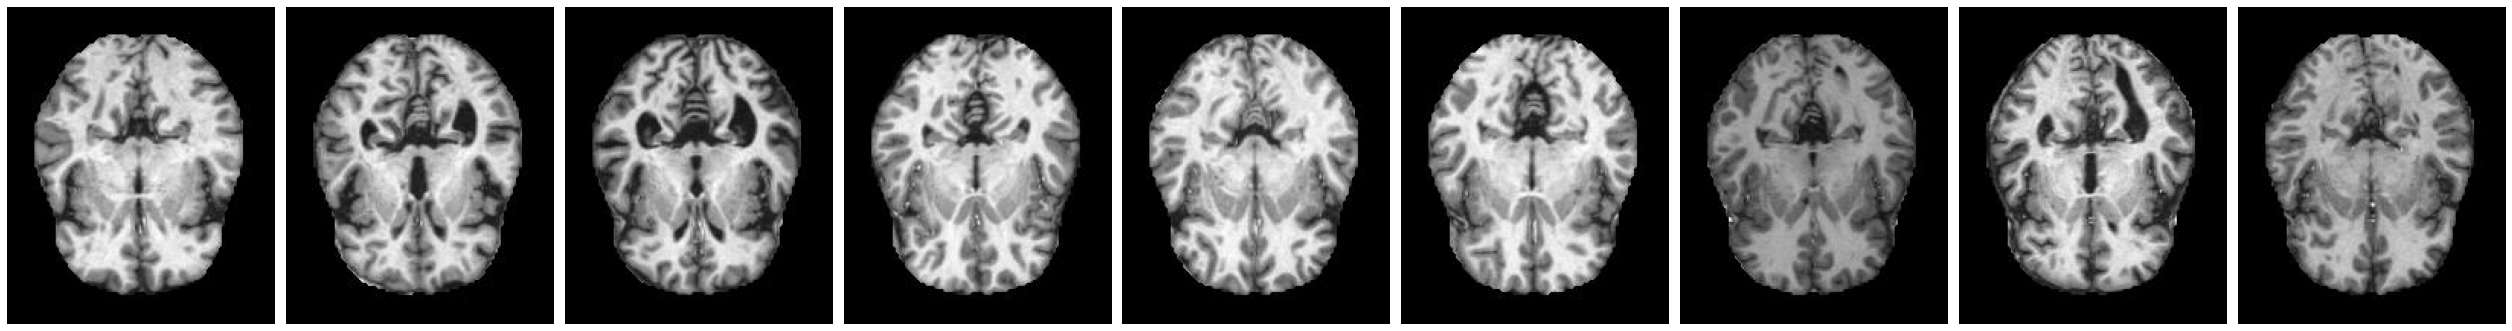

In [ ]:
print("")
print("Trainned data for NonDemented:")
print("")
Images_details(dir_name_train_NonDemented)
print("")
plot_images(dir_name_train_NonDemented, 9)

In [ ]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(208,208,3),activation='relu'))#defining convolution layer and activation function
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [ ]:
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train',target_size=(208,208),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/test',target_size=(208,208),batch_size=32,class_mode='categorical')

Found 387 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [ ]:
img_dims = 150
epochs = 7
batch_size = 32

In [ ]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/7
12/12 [==============================] - 61s 5s/step - loss: 4.8996 - accuracy: 0.7578 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 2/7
12/12 [==============================] - 4s 320ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/7
12/12 [==============================] - 4s 316ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/7
12/12 [==============================] - 4s 313ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/7
12/12 [==============================] - 4s 339ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.8210e-04 - val_accuracy: 1.0000
Epoch 6/7
12/12 [==============================] - 4s 311ms/step - loss: 2.1607 - accuracy: 0.9183 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 7/7
12/12 [==============================] - 4s 314ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000


In [ ]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

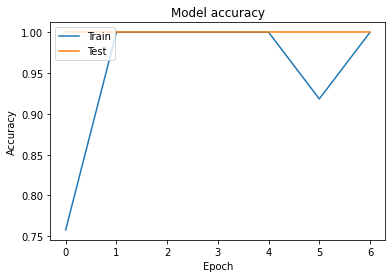

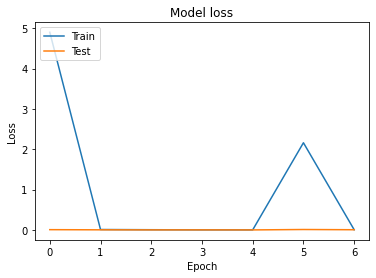

In [ ]:
graph()